In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random

In [150]:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [109]:
df_of_sexes = pd.DataFrame({'males': [data['Sex'].value_counts()[0]], 'females': [data['Sex'].value_counts()[1]]}, index=[''])

df_of_sexes

,males,females
,577,314


In [178]:
died = data['Survived'].value_counts(normalize=True)[0]
survived = data['Survived'].value_counts(normalize=True)[1]

df_of_survived = pd.DataFrame({'died': [died], 'survived': [survived]}, index=[''])

df_of_survived.round(2)

,died,survived
,0.62,0.38


In [146]:
first_class = data['Pclass'].value_counts(normalize=True, sort=True).round(2)

df_first_class = pd.DataFrame({'first class passangers, %': [100 * first_class[1]]}, index=[''])

df_first_class

,"first class passangers, %"
,24.0


df.agg() позволяет вбивать внутрь все методы и функции, которые мы хотим применить к датафрейму

Можно было бы просто сделать df.median и df.mean, но я решил применить df.agg() для этих методов

In [164]:
age_df = data['Age']

age_final_df = pd.DataFrame({'средний возраст': [age_df.agg(['mean', 'median'])['mean']], 'медиана возраста': [age_df.agg(['mean', 'median'])['median']]}, index=['']).round(2)

age_final_df

,средний возраст,медиана возраста
,29.7,28.0


Построю диаграмму распределения возрастов:

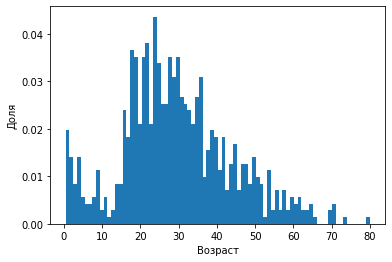

In [177]:
plt.hist(data['Age'], 80,  density=True)
plt.xlabel('Возраст')
plt.ylabel('Доля')

plt.show()

Проверка корелляции признаков SibSp и Parch:

In [179]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
